## Data aggregation

Goal: create 1 dataset with relevant synthesis parameters and measurement outcomes for everything I've made

Columns in output: UUID, volume fractions of everything, fit results processed with Null if version wasn't best

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

## Load synthesis files

In [4]:
synthesis_files = ['/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_14_highlights_replicates/2024_10_14_highlights_replicates_sampletable.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_11_04_OptimizationRound1/SampleTable_2024_11_04_OptimizationRound1.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_11_11_OptimizationRound2/SampleTable_2024_11_11_OptimizationRound2.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_11_14_OptimRound3/SampleTable_2024_11_14_OptimizationRound3.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_11_18_optimizationRound4/SampleTable_2024_11_18_OptimizationRound4.csv'] 

In [5]:
fp2name = {'/home/bgpelkie/Code/silica-np-synthesis/2024_10_14_highlights_replicates/2024_10_14_highlights_replicates_sampletable.csv':'2024_10_14_highlights_replicates',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv':'2024_10_07_randomSampleV3', 
           '/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv':'2024_10_04_RandomBaseline_v2', 
           '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv':'2024_10_17_RandomBaselineV4',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_11_04_OptimizationRound1/SampleTable_2024_11_04_OptimizationRound1.csv':'2024_11_04_OptimizationRound1',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_11_11_OptimizationRound2/SampleTable_2024_11_11_OptimizationRound2.csv':'2024_11_11_OptimizationRound2',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_11_14_OptimRound3/SampleTable_2024_11_14_OptimizationRound3.csv':'2024_11_14_OptimRound3',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_11_18_optimizationRound4/SampleTable_2024_11_18_OptimizationRound4.csv':'2024_11_18_OptimRound4'
          }



In [6]:
synth_tables = []
count = 0
for fp in synthesis_files:
    data= pd.read_csv(fp)
    name = fp2name[fp]
    data['campaign'] = [name]*len(data)
    synth_tables.append(data)
    count += len(data)
    

synth_table = pd.concat(synth_tables, axis = 0)

In [7]:
for table, synth_file in zip(synth_tables, synthesis_files):
    for val in table['uuid'].to_list():
        if 'd298bae0-5f86-4a29-b399-111644195748' == val:
            print(synth_file)

/home/bgpelkie/Code/silica-np-synthesis/2024_11_11_OptimizationRound2/SampleTable_2024_11_11_OptimizationRound2.csv


In [8]:
synth_table = synth_table.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
synth_table = synth_table.drop(['well', 'ethanol_dilute_vol', 'sample_dilute_vol', 'dilute_well'], axis = 1)

In [9]:
synth_table = synth_table.set_index('uuid')

In [10]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign
uuid,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2
...,...,...,...,...,...,...,...,...
2e8bb17e-1309-48a3-b163-fc3b9d98c2ce,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4
bdbab155-503c-455f-a133-8cd6be1edaff,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4
51c0142b-f0e3-4fe5-8733-f22fc5bc5b10,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4


## Get volume fractions

In [11]:
def target_vol(row):
    target_vol = row['teos_volume'] + row['ammonia_volume'] + row['water_volume'] + row['ethanol_volume']
    return target_vol
    

In [12]:
synth_table['target_volume'] = synth_table.apply(target_vol, axis=1)

In [13]:
synth_table['teos_vol_frac'] = synth_table['teos_volume']/synth_table['target_volume']
synth_table['ammonia_vol_frac'] = synth_table['ammonia_volume']/synth_table['target_volume']
synth_table['water_vol_frac'] = synth_table['water_volume']/synth_table['target_volume']
synth_table['ethanol_vol_frac'] = synth_table['ethanol_volume']/synth_table['target_volume']

In [14]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac
uuid,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,1700.0,0.029542,0.073083,0.097024,0.800351
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,1700.0,0.098180,0.062087,0.048724,0.791009
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,1700.0,0.049105,0.033951,0.103001,0.813944
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,1700.0,0.112022,0.061094,0.082243,0.744642
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,1700.0,0.044250,0.100538,0.110330,0.744882
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2e8bb17e-1309-48a3-b163-fc3b9d98c2ce,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4,1700.0,0.053400,0.008200,0.071100,0.867300
bdbab155-503c-455f-a133-8cd6be1edaff,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4,1700.0,0.053400,0.008200,0.071100,0.867300
51c0142b-f0e3-4fe5-8733-f22fc5bc5b10,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4,1700.0,0.053400,0.008200,0.071100,0.867300


In [15]:
synth_table.to_csv('synth_table_master_11_11_24.csv')

## Load distance file

In [16]:
distance_results = pd.read_csv('../2024_11_18_optimizationRound4/amplitude_phase_results_afterOptimRound3_11_18_24.csv')

In [17]:
distance_results = distance_results.set_index('uuid')

In [18]:
distance_results

,Unnamed: 0,amplitude_distance,phase_distance,sum_ap_distance,sphere_diameter_nm,sphere_pdi,processes_status
uuid,,,,,,,
770a433d-0480-4cee-bf12-ce066c24db55,0,1.079610,0.407451,1.487061,47.474161,0.591172,success
fed3ab35-04e9-4916-8527-8627191a3bdc,1,0.474113,0.177540,0.651653,107.459643,0.132383,success
4ab46dcc-3395-4e7b-bb87-52e805e12abb,2,0.979413,0.540022,1.519435,66.709556,1.000000,success
23850c30-c572-41ad-abf0-7e1bd4fa7397,3,1.176489,0.445089,1.621578,21.500925,0.559668,success
96ef6012-d812-4975-8b77-8ed7e78669fb,4,1.003274,0.520217,1.523491,67.307375,0.567666,success
...,...,...,...,...,...,...,...
52812388-4002-435e-a8df-fc39c962903f,195,0.862854,0.362438,1.225292,110.693149,0.209575,success
f9c5e673-ef4c-4e1e-832d-307ab7bd2d99,196,0.969198,0.389132,1.358330,84.371104,0.285823,success
bdbbf131-7db4-4768-846e-2de75e623ef2,197,0.891382,0.566166,1.457548,95.618349,0.710525,success


In [19]:
distance_list = []
experiment_status = []

for uuid_val in synth_table.index:
    #print(uuid_val)
    try:
        row = distance_results.loc[uuid_val]
    except KeyError:
        distance_list.append(None)
        experiment_status.append('incomplete')
        continue

    if row['processes_status'] == 'failed':
        distance_list.append(distance_results['sum_ap_distance'].max())
        experiment_status.append('complete')
    if row['processes_status'] == 'success':
        distance_list.append(row['sum_ap_distance'])
        experiment_status.append('complete')
        


In [20]:
synth_table['ap_distance'] = distance_list
synth_table['experiment_status'] = experiment_status

In [21]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,experiment_status
uuid,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,1700.0,0.029542,0.073083,0.097024,0.800351,1.290007,complete
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,1700.0,0.098180,0.062087,0.048724,0.791009,1.550737,complete
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,1700.0,0.049105,0.033951,0.103001,0.813944,1.385839,complete
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,1700.0,0.112022,0.061094,0.082243,0.744642,1.504827,complete
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,1700.0,0.044250,0.100538,0.110330,0.744882,1.633039,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2e8bb17e-1309-48a3-b163-fc3b9d98c2ce,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4,1700.0,0.053400,0.008200,0.071100,0.867300,0.960476,complete
bdbab155-503c-455f-a133-8cd6be1edaff,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4,1700.0,0.053400,0.008200,0.071100,0.867300,1.240421,complete
51c0142b-f0e3-4fe5-8733-f22fc5bc5b10,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4,1700.0,0.053400,0.008200,0.071100,0.867300,1.615752,complete


In [22]:
synth_table.to_csv('synth_table_ap_distance_11_21_24.csv')

In [23]:
synth_table['rank'] = rank = synth_table['ap_distance'].rank()

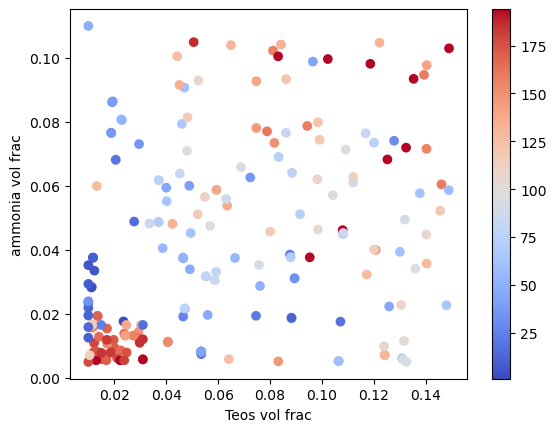

In [24]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table['teos_vol_frac'], synth_table['ammonia_vol_frac'], c = synth_table['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
cbar = fig.colorbar(sc, ax = ax)

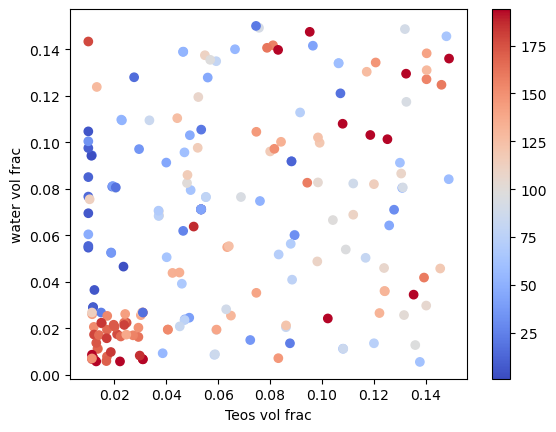

In [25]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table['teos_vol_frac'], synth_table['water_vol_frac'], c = synth_table['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('water vol frac')
cbar = fig.colorbar(sc, ax = ax)

In [26]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,1700.0,0.029542,0.073083,0.097024,0.800351,1.290007,complete,35.0
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,1700.0,0.098180,0.062087,0.048724,0.791009,1.550737,complete,109.0
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,1700.0,0.049105,0.033951,0.103001,0.813944,1.385839,complete,47.0
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,1700.0,0.112022,0.061094,0.082243,0.744642,1.504827,complete,88.0
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,1700.0,0.044250,0.100538,0.110330,0.744882,1.633039,complete,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2e8bb17e-1309-48a3-b163-fc3b9d98c2ce,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4,1700.0,0.053400,0.008200,0.071100,0.867300,0.960476,complete,15.0
bdbab155-503c-455f-a133-8cd6be1edaff,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4,1700.0,0.053400,0.008200,0.071100,0.867300,1.240421,complete,28.0
51c0142b-f0e3-4fe5-8733-f22fc5bc5b10,90.779998,13.940000,120.869994,1474.410008,0.418004,14.373058,0.017684,2024_11_18_OptimRound4,1700.0,0.053400,0.008200,0.071100,0.867300,1.615752,complete,122.0


In [27]:
synth_table.loc['1a084599-bbe6-4de7-89ef-9791617c5e9f']

teos_volume                                   17.0
ammonia_volume                           26.973989
water_volume                            130.216619
ethanol_volume                         1525.809392
dilution_volume_fraction                  2.232143
silica_mass_conc                          2.691584
silica_mass_fraction                      0.003329
campaign                    2024_11_14_OptimRound3
target_volume                               1700.0
teos_vol_frac                                 0.01
ammonia_vol_frac                          0.015867
water_vol_frac                            0.076598
ethanol_vol_frac                          0.897535
ap_distance                               0.953726
experiment_status                         complete
rank                                          14.0
Name: 1a084599-bbe6-4de7-89ef-9791617c5e9f, dtype: object

In [28]:

name_bounds = {}
for name in fp2name.values():
    name_bounds[name] = []
    count = 0
    for i, row in synth_table.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds[name].append(count)
        count += 1
        

In [29]:
best_distances = []
for i, row in synth_table.iterrows():
    dist = row['ap_distance']
    if len(best_distances) == 0:
        best_distances.append(dist)
    else:
        best_distances.append(min(best_distances[-1], dist))

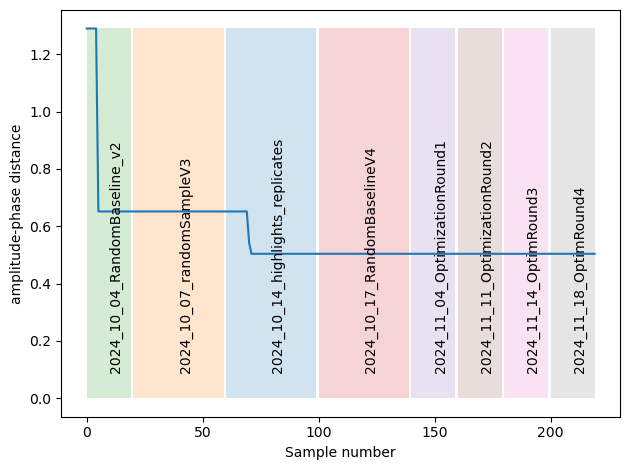

In [32]:
fig, ax = plt.subplots()

for name, bounds in name_bounds.items():
    ax.fill_between(bounds, 0, max(best_distances), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances)


ax.set_xlabel('Sample number')
ax.set_ylabel('amplitude-phase distance')

plt.tight_layout()
plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [34]:
sorted_names = []
names = list(name_bounds.keys())
bounds_low = [min(bounds) for bounds in name_bounds.values()]

sorted_names = np.array(names)[np.argsort(bounds_low)]

In [35]:
sorted_names

array(['2024_10_04_RandomBaseline_v2', '2024_10_07_randomSampleV3',
       '2024_10_14_highlights_replicates', '2024_10_17_RandomBaselineV4',
       '2024_11_04_OptimizationRound1', '2024_11_11_OptimizationRound2',
       '2024_11_14_OptimRound3', '2024_11_18_OptimRound4'], dtype='<U32')

In [36]:
np.argsort(bounds_low)

array([2, 1, 0, 3, 4, 5, 6, 7])

In [37]:
np.mean(bounds)

209.5

In [38]:
## best for campaign plot

name_distances = {}
for name in sorted_names:
    name_distances[name] = []
    count = 0
    for i, row in synth_table.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_distances[name].append(row['ap_distance'])
        count += 1

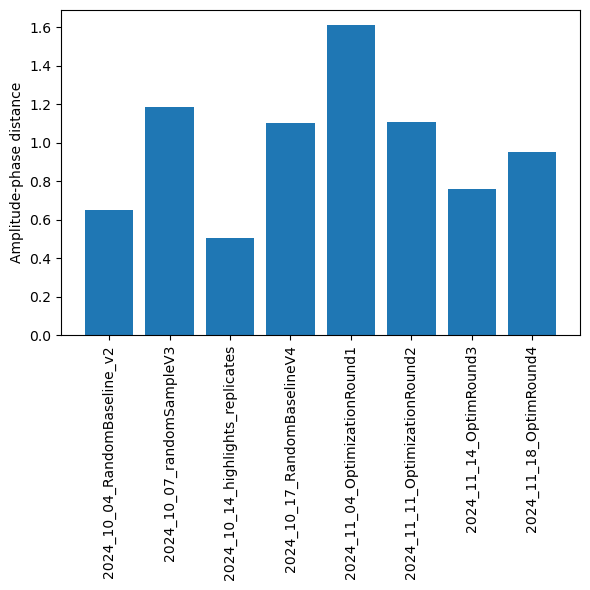

In [39]:
fig, ax = plt.subplots(figsize = (6,6))
name_distances_max = [np.nanmin(distances) for distances in name_distances.values()]
ax.bar(name_distances.keys(), name_distances_max)
ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Amplitude-phase distance')

plt.tight_layout()

plt.savefig('best_per_campaign.png', dpi = 300)

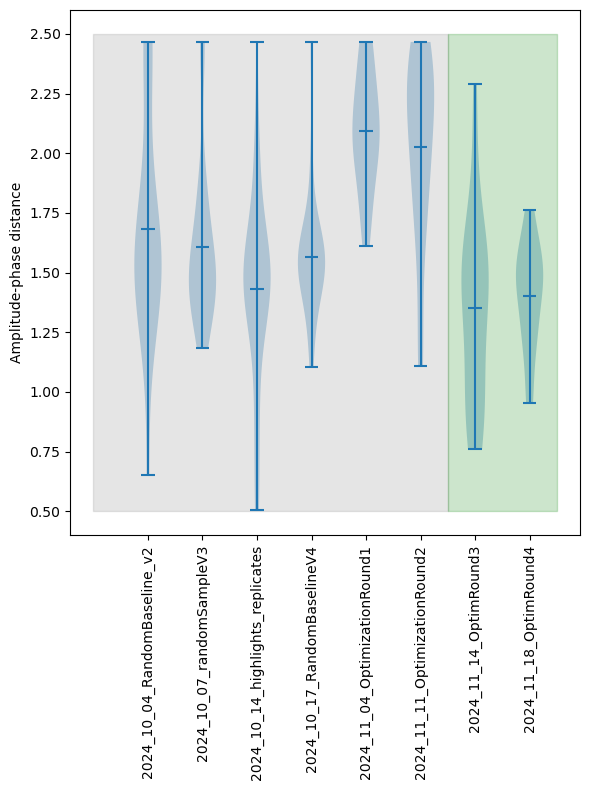

In [40]:
fig, ax = plt.subplots(figsize = (6,8))


vals = []
for name in sorted_names:
    vallist = name_distances[name]
    items = []
    for entry in vallist:
        if not np.isnan(entry):
            items.append(entry)
    vals.append(items)

ax.violinplot(vals, showmeans = True)
ax.set_xticks([x+1 for x in range(len(sorted_names))], labels=sorted_names)
ax.tick_params(axis = 'x', rotation = 90)
ax.fill_between((0, 6.5), 0.5, 2.5, alpha = 0.2, color = 'grey')
ax.fill_between((6.5, 8.5), 0.5, 2.5, alpha = 0.2, color = 'green')
ax.set_ylabel('Amplitude-phase distance')

plt.tight_layout()
plt.savefig('Convergence_violin_plot.png', dpi = 300)

In [52]:
np.nanmin(vals[0])

np.float64(0.5039232053596436)

In [53]:
np.nanmin(vals_clean[0])

np.float64(0.5039232053596436)

In [107]:
synth_table.loc['a6ee3a08-02cd-4703-9d6c-3721dad590c8']

teos_volume                                             91.0
ammonia_volume                                          14.0
water_volume                                           121.0
ethanol_volume                                        1475.0
dilution_volume_fraction                             0.20055
silica_mass_conc                                   14.379621
silica_mass_fraction                                0.017693
campaign                    2024_10_14_highlights_replicates
target_volume                                         1701.0
teos_vol_frac                                       0.053498
ammonia_vol_frac                                     0.00823
water_vol_frac                                      0.071135
ethanol_vol_frac                                    0.867137
ap_distance                                         0.503923
experiment_status                                   complete
Name: a6ee3a08-02cd-4703-9d6c-3721dad590c8, dtype: object

In [106]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,experiment_status
uuid,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,1700.0,0.029542,0.073083,0.097024,0.800351,1.290007,complete
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,1700.0,0.098180,0.062087,0.048724,0.791009,1.550737,complete
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,1700.0,0.049105,0.033951,0.103001,0.813944,1.385839,complete
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,1700.0,0.112022,0.061094,0.082243,0.744642,1.504827,complete
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,1700.0,0.044250,0.100538,0.110330,0.744882,1.633039,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7f042b90-a311-4af9-bb43-69e8c874b62c,17.000000,49.949998,92.868942,1540.181060,2.232143,2.691584,0.003342,2024_11_14_OptimRound3,1700.0,0.010000,0.029382,0.054629,0.905989,0.894470,complete
a53538a9-2e62-41df-ab0b-de034c8bd0aa,17.000000,21.387521,165.744269,1495.868210,2.232143,2.691584,0.003313,2024_11_14_OptimRound3,1700.0,0.010000,0.012581,0.097497,0.879922,0.907345,complete
1a084599-bbe6-4de7-89ef-9791617c5e9f,17.000000,26.973989,130.216619,1525.809392,2.232143,2.691584,0.003329,2024_11_14_OptimRound3,1700.0,0.010000,0.015867,0.076598,0.897535,0.953726,complete
